# K-Means

K-means is used for clustering such as unlabled data. 


k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. (Wikipedia)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View columns 
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


Pre-processing Data

In [3]:
X = dataset[['Open','High','Low','Close','Adj Close','Volume']]

Normalizing over the standard deviation

In [6]:
from sklearn.preprocessing import StandardScaler
X = dataset.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.63841038, -0.63386523, -0.62754122, -0.62754122, -0.50102319],
       [-0.63439667, -0.62549188, -0.6173066 , -0.6173066 , -0.43332499],
       [-0.59827322, -0.60246516, -0.59069658, -0.59069658,  0.13143746],
       ...,
       [ 3.04216769,  2.98760923,  3.12651808,  3.12651808,  2.18790785],
       [ 3.37931988,  3.30789014,  3.47244808,  3.47244808,  3.66078372],
       [ 4.04158291,  3.71818418,  3.73445438,  3.73445438,  8.31323182]])

k-means Modeling

In [8]:
from sklearn.cluster import KMeans 

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 2 ... 1 1 1]


In [9]:
dataset["Prices"] = labels
dataset.head(5)

,Open,High,Low,Close,Adj Close,Volume,Clus_km
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,0
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,0
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,2
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,2
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0


In [10]:
dataset.groupby('Prices').mean()

,Open,High,Low,Close,Adj Close,Volume
Clus_km,,,,,,
0,4.390013,4.464206,4.314272,4.388585,4.388585,1.871029e+07
1,12.799600,13.336200,12.342400,12.841600,12.841600,1.532736e+08
2,11.507399,11.748954,11.262198,11.510349,11.510349,6.083450e+07


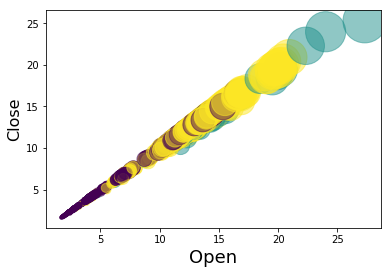

In [13]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Open', fontsize=18)
plt.ylabel('Close', fontsize=16)

plt.show()

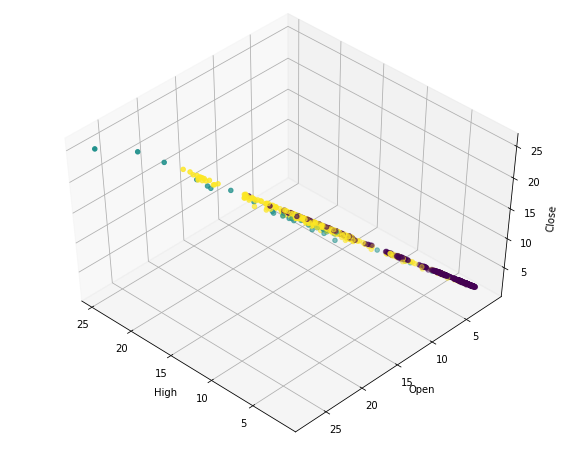

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('High', fontsize=18)
# plt.xlabel('Open', fontsize=16)
# plt.zlabel('Close', fontsize=16)
ax.set_xlabel('High')
ax.set_ylabel('Open')
ax.set_zlabel('Close')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))